In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [32]:
data = pd.read_csv("user_data.csv")
data

,age,gender,income,utilities,entertainment,school_fees,shopping,healthcare
0,42,Male,98649,220,358,0,443,85
1,25,Male,87547,197,110,0,108,58
2,48,Male,89583,242,240,530,441,166
3,52,Female,35140,228,315,1066,67,93
4,40,Male,58456,249,384,0,161,73
5,41,Male,35986,271,449,1341,309,127
6,46,Male,20023,80,217,1768,79,151
7,58,Male,76808,102,298,0,164,178
8,26,Female,99374,201,314,0,434,75
9,47,Male,57929,127,188,0,385,151


In [33]:
data.shape

(54, 8)

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,54.0,42.592593,13.476070,19.0,33.25,43.0,54.75,65.0
income,54.0,60620.611111,24813.201102,20023.0,38669.50,58449.0,81371.75,99653.0
utilities,54.0,180.074074,73.717936,56.0,127.25,195.0,238.00,292.0
entertainment,54.0,261.592593,137.604234,56.0,128.75,245.5,373.00,495.0
school_fees,54.0,252.185185,547.282965,0.0,0.00,0.0,0.00,1904.0
shopping,54.0,257.296296,142.230829,53.0,125.00,264.5,369.75,498.0
healthcare,54.0,124.555556,47.143165,50.0,74.25,133.0,165.25,196.0


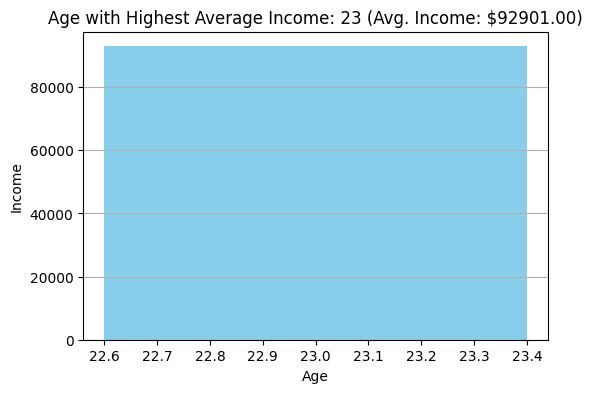

In [127]:
# Show the ages with the highest income
highest_income_age = data.groupby('age')['income'].mean().sort_values(ascending=False).head(1).index[0]
highest_income = data.loc[df['age'] == highest_income_age, 'income'].values[0]

plt.figure(figsize=(6, 4))
plt.bar(highest_income_age, highest_income, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f'Age with Highest Average Income: {highest_income_age} (Avg. Income: ${highest_income:.2f})')
plt.grid(axis='y')
plt.show()



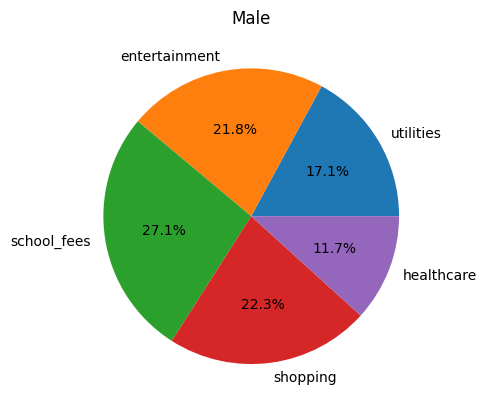

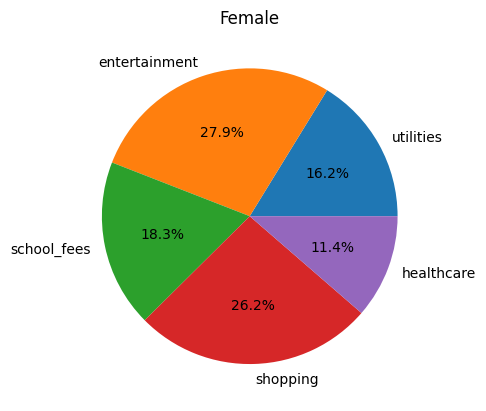

In [148]:
# Show the gender distribution across spending categories

categories = ["utilities","entertainment","school_fees","shopping","healthcare"]

def analyze_gender_spending(users, categories):
    gender_spending = {"Male": {cat: 0 for cat in categories}, "Female": {cat: 0 for cat in categories}}
    for user in users:
        gender = user["gender"]
        for category in categories:
            gender_spending[gender][category] += user[category]

    return gender_spending

gender_spending = analyze_gender_spending(data.to_dict('records'),categories)


# gender_distribution.plot(kind='bar', stacked=True, colormap='Set2')
plt.pie(gender_spending['Male'].values(),labels=categories,autopct='%.1f%%')


plt.title('Male')
plt.show()

plt.pie(gender_spending['Female'].values(),labels=categories,autopct='%.1f%%')
plt.title('Female')
plt.show()


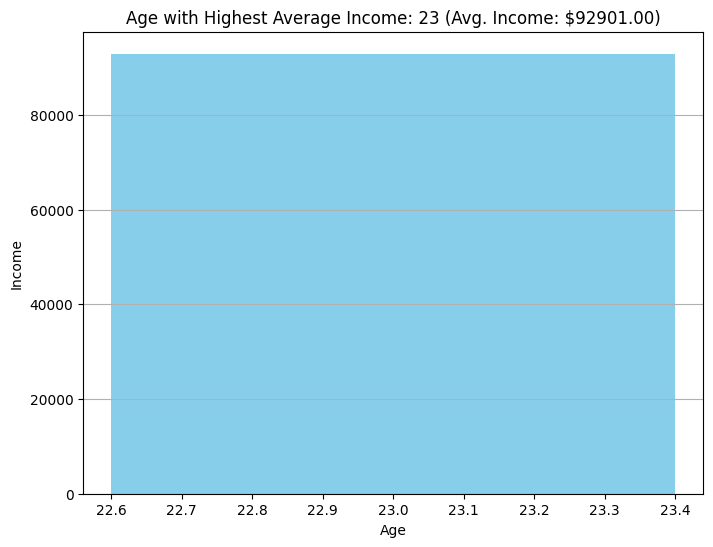

In [152]:
# Export charts for PowerPoint (using matplotlib)
plt.figure(figsize=(8, 6))

#creating the first chart, income with the highest income 
plt.bar(highest_income_age, highest_income, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f'Age with Highest Average Income: {highest_income_age} (Avg. Income: ${highest_income:.2f})')
plt.grid(axis='y')

# Save the chart to a high-resolution image file (e.g., PNG)
plt.savefig('highest_income_age.png', dpi=100, bbox_inches='tight')



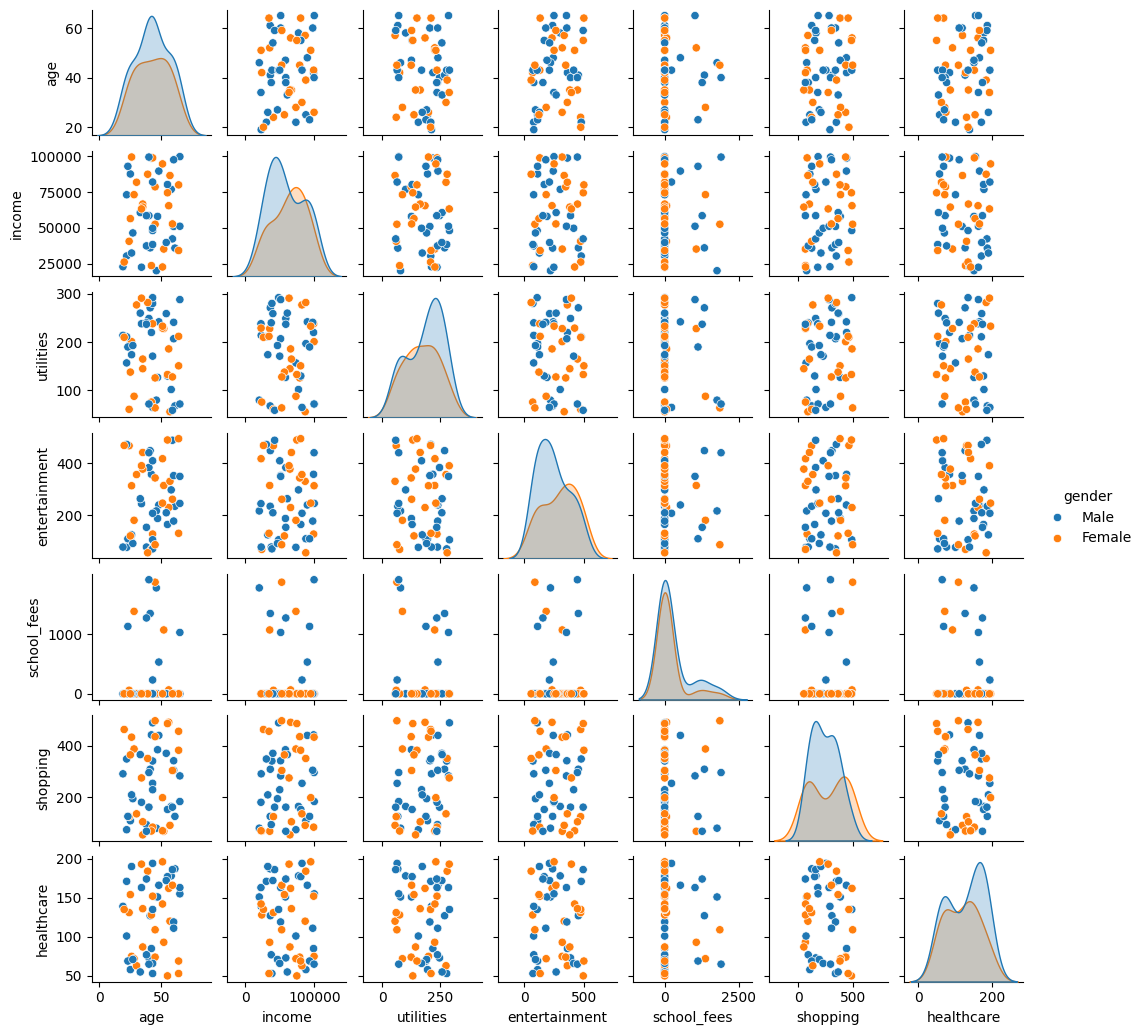

In [158]:
sns.pairplot(data, hue= "gender", height = 1.5)